In [1]:
ls -lrt

total 88
-rw-rw-r-- 1 anibrata anibrata     0 apr 15 23:12 replicate
-rw-rw-r-- 1 anibrata anibrata   769 mag 24 14:41 tokenCount.py
-rw-r--r-- 1 anibrata anibrata     0 mag 30 16:02 dataset.db
drwxrwxr-x 4 anibrata anibrata  4096 giu  5 11:58 static/
-rw-rw-r-- 1 anibrata anibrata  6102 giu  7 17:19 similarity_score.py
drwxrwxr-x 2 anibrata anibrata  4096 giu  7 17:19 __pycache__/
-rw-rw-r-- 1 anibrata anibrata  3093 giu 10 01:11 listSimilar.py
-rw-rw-r-- 1 anibrata anibrata  2585 giu 24 17:14 dataLoadSimilarity.py
-rw-rw-r-- 1 anibrata anibrata  5041 giu 24 17:14 dataLoad.py
drwxrwxr-x 2 anibrata anibrata  4096 set  3 10:59 templates/
-rw-rw-r-- 1 anibrata anibrata  6497 set  3 16:33 oaiAnalyze.py
-rw-rw-r-- 1 anibrata anibrata 18938 set  5 10:37 app.py
-rw-rw-r-- 1 anibrata anibrata  2414 set 10 10:55 db2csv.py
-rw-rw-r-- 1 anibrata anibrata   192 set 12 10:31 test.py
-rw-rw-r-- 1 anibrata anibrata 11815 set 12 18:06 QBUGS_Data_Analysis.ipynb


In [208]:
import pandas as pd
import numpy as np

# Set maximum column width to None (no truncation)
pd.set_option('display.max_colwidth', None)

# Set maximum number of rows to display
pd.set_option('display.max_rows', None)

# Set pandas display options to left-align text
pd.options.display.colheader_justify = 'left'  # for column headers
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)

In [113]:
# Read data from dataset.csv in the DATA folder into dataframe df
df = pd.read_csv('../DATA/dataset.csv', delimiter=',')

In [114]:
print(df.head())

   Index            Repository  \
0      1  WaveFunctionCollapse   
1      2              deepchem   
2      3              deepchem   
3      4              deepchem   
4      5              deepchem   

                                      Commit Message  \
0                Update README.md\n\nFix broken link   
1  Differentiation Infrastructure in Deepchem Tut...   
2  Differentiation Infrastructure in Deepchem Tut...   
3  add torch-cluster to env (#3967)\n\n* add torc...   
4  add torch-cluster to env (#3967)\n\n* add torc...   

                                            Filename  \
0                                          README.md   
1  examples/tutorials/Differentiation_Infrastruct...   
2  examples/tutorials/website-render-order/9-deep...   
3                        .github/workflows/build.yml   
4                        requirements/env_common.yml   

                                       Code Changes   \
0  @@ -30,7 +30,7 @@ Wave Function Collapse algor...   
1  @@ -0,

In [115]:
df.columns

Index(['Index', 'Repository', 'Commit Message', 'Filename', 'Code Changes ',
       'Symptom', 'Description', 'Bug Type', 'Bug Pattern', 'Vulnerability',
       'Test Case'],
      dtype='object')

In [116]:
# Trim spaces and separate Classical and Quantum records based on the 'Bug Type' column
df['Bug Type'] = df['Bug Type'].str.strip()

### Separate the Classical and Quantum

In [117]:
# Separate Classical and Quantum records based on the 'Bug Type' column
df_classical = df[df['Bug Type'] == 'Classical'].copy()
df_quantum = df[df['Bug Type'] == 'Quantum'].copy()

In [118]:
len(df_quantum)

988

In [119]:
df_classical.head()

,Index,Repository,Commit Message,Filename,Code Changes,Symptom,Description,Bug Type,Bug Pattern,Vulnerability,Test Case
0,1,WaveFunctionCollapse,Update README.md\n\nFix broken link,README.md,"@@ -30,7 +30,7 @@ Wave Function Collapse algor...",Link to Free Pascal repository was incorrect.,A corrected directory path in the Free Pascal...,Classical,Incorrect URL path correction in documentation.,None identified; this is not a vulnerability.,Verify that the new link leads to the correct...
1,2,deepchem,Differentiation Infrastructure in Deepchem Tut...,examples/tutorials/Differentiation_Infrastruct...,"@@ -0,0 +1,552 @@\n+{\n+ ""cells"": [\n+ {\n+ ...",The code change likely introduces a new tutori...,This tutorial elaborates on differentiable op...,Classical,Documentation enhancement for improved unders...,None identified. The original code's output m...,Verify clarity and functionality of optimizat...
2,3,deepchem,Differentiation Infrastructure in Deepchem Tut...,examples/tutorials/website-render-order/9-deep...,"@@ -2,3 +2,4 @@ Title,File Name\n Physics Info...",The addition of a new entry suggests a feature...,The change likely serves to include a new res...,Classical,Adding educational content for user experienc...,No specific vulnerabilities were targeted by ...,Verify that the added tutorial is accessible ...
3,4,deepchem,add torch-cluster to env (#3967)\n\n* add torc...,.github/workflows/build.yml,"@@ -20,6 +20,7 @@ jobs:\n strategy:\n ...",Improper installation of dependencies on macOS...,This change allows the installation of libomp...,Classical,Dependency installation issue for macOS ARM a...,Dependency installation failure on macOS ARM6...,Implement a test that verifies libomp install...
4,5,deepchem,add torch-cluster to env (#3967)\n\n* add torc...,requirements/env_common.yml,"@@ -13,7 +13,7 @@ dependencies:\n - pre-co...",Dependency restriction causing potential compa...,Removing version pinning for lightgbm allows ...,Classical,Dependency version flexibility adjustment.,Resolves potential incompatibility with diver...,Test installation under varying lightgbm vers...


In [120]:
df_quantum.head()

,Index,Repository,Commit Message,Filename,Code Changes,Symptom,Description,Bug Type,Bug Pattern,Vulnerability,Test Case
40,41,deepchem,Dft Part 5 (#3895)\n\n* ks.py and scf_qccalc.p...,deepchem/utils/dft_utils/__init__.py,"@@ -48,6 +48,10 @@\n from deepchem.utils.d...",Code change likely introduces new functionalit...,The addition of SCF_QCCalc and related classe...,Quantum,Addition of new classes and imports in DFT-re...,No known specific vulnerabilities addressed.,Create a test case that verifies SCF calculat...
42,43,deepchem,Dft Part 5 (#3895)\n\n* ks.py and scf_qccalc.p...,deepchem/utils/dft_utils/qccalc/hf.py,"@@ -0,0 +1,612 @@\n+""""""Part of this code adopt...",Improper Hartree-Fock implementation leading t...,The addition of a complete Hartree-Fock imple...,Quantum,Implementation of Restricted/Unrestricted Koh...,Enhances accuracy in quantum chemical computa...,Implement tests for energy calculations with ...
46,47,deepchem,Dft Part 5 (#3895)\n\n* ks.py and scf_qccalc.p...,docs/source/api_reference/utils.rst,"@@ -371,6 +371,21 @@ The utilites here are use...",Inclusion of additional classes in documentation,The change adds references for quantum chemis...,Quantum,Documentation enhancement for missing quantum...,N/A,Verify that all added classes render correctl...
73,74,qiskit,Add release notes for manual `Var` and `Store`...,releasenotes/notes/storage-var-a00a33fcf9a71f3...,"@@ -0,0 +1,122 @@\n+---\n+features_circuits:\n...",The code change introduces new functionality f...,This enhancement likely stems from the need f...,Quantum,Feature addition and performance improvement ...,This resolves issues related to variable mana...,Create a circuit with uninitialized variables...
74,75,qiskit,Avoid lossing precision when scaling frequenci...,qiskit/qobj/converters/pulse_instruction.py,"@@ -234,7 +234,7 @@ def _convert_set_frequency...",Incorrect frequency scaling during quantum ins...,The change corrects the scaling factor from s...,Quantum,Frequency scaling adjustment for quantum inst...,Improper frequency interpretation could lead ...,Create a test that uses frequency values arou...


In [121]:
from tqdm.autonotebook import tqdm, trange
from sentence_transformers import SentenceTransformer

In [122]:
# Load a pre-trained BERT model for sentence embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/home/anibrata/Anibrata/PROJECTS/CODE/main_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [123]:
# Generate BERT embeddings for each quantum bug pattern
quantum_bert_embeddings = model.encode(df_quantum['Bug Pattern'].tolist())

In [124]:
# Generate BERT embeddings for each classical bug pattern
classical_bert_embeddings = model.encode(df_classical['Bug Pattern'].tolist())

In [125]:
# bert_embeddings = model.encode(df['Bug Pattern'].tolist())

In [126]:
# len(bert_embeddings)

In [127]:
len(quantum_bert_embeddings), len(classical_bert_embeddings)

(988, 4056)

In [128]:
from sklearn.metrics.pairwise import cosine_distances
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

### Process Quantum Embeddings

In [129]:
# Compute cosine distance matrix
quantum_cosine_dist_matrix = cosine_distances(quantum_bert_embeddings)

In [130]:
# To remove the warning - /tmp/ipykernel_58819/1191576362.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
# dendrogram = sch.dendrogram(sch.linkage(cosine_dist_matrix, method='ward'))

# Convert square distance matrix to condensed form 
quantum_condensed_cosine_dist_matrix = squareform(quantum_cosine_dist_matrix)


In [132]:
quantum_condensed_cosine_dist_matrix

array([0.61149913, 0.7901882 , 0.76368266, ..., 0.82159925, 0.9193199 ,
       0.7124255 ], dtype=float32)

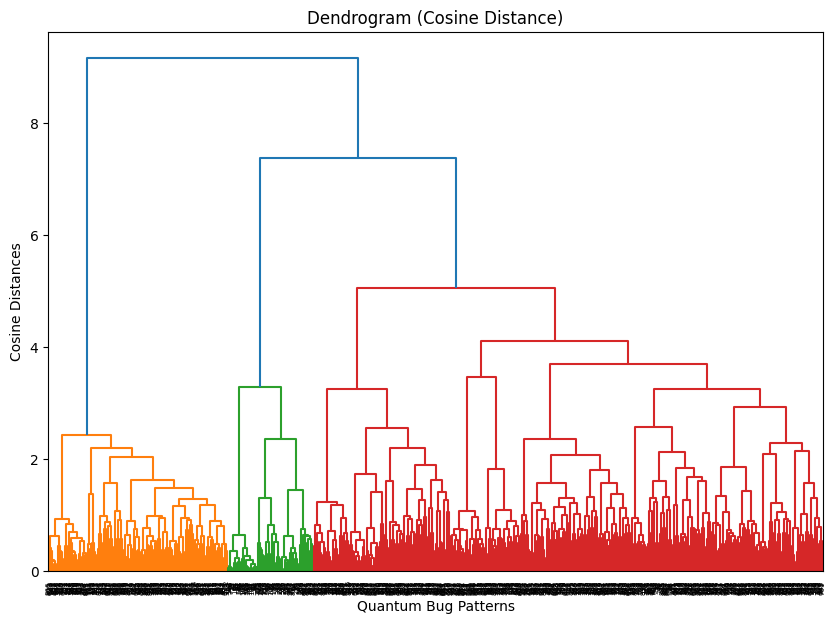

In [133]:
# Plot the dendrogram based on cosine distance
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(quantum_condensed_cosine_dist_matrix, method='ward'))
plt.title('Dendrogram (Cosine Distance)')
plt.xlabel('Quantum Bug Patterns')
plt.ylabel('Cosine Distances')
plt.show()

In [134]:
def func_hc(num):
    hc_cosine = AgglomerativeClustering(
        n_clusters=None, 
        distance_threshold=num/10,  # Adjust this threshold based on the data - larger value leads to fewer clusters
        metric='precomputed',  # Using precomputed cosine distance matrix
        linkage='average'  # Average linkage tends to work well with cosine distance
    )
    return hc_cosine

In [135]:
# Check the number of clusters for different values of distance theshold.
for i in range(1,10):
    hc_cosine = func_hc(i)
    df_quantum['Quantum Bug Cluster'] = hc_cosine.fit_predict(cosine_dist_matrix)
    print(i/10, len(np.unique(df_quantum['Quantum Bug Cluster'])))

0.1 908
0.2 790
0.3 597
0.4 378
0.5 214
0.6 94
0.7 38
0.8 6
0.9 1


### Quantum Annotated Code Changes:
---
#### Hierarchical Clustering + BERT:
Threshold Patterns

| Threshold Values | No. Clusters |
|---|---|
| 0.1 | 908 |  
| 0.2 | 790 |
| 0.3|597|
|0.4|378|
|0.5|214|
|0.6|94|
|0.7|38|
|0.8|6|
|0.9|1|


In [136]:
# Perform Agglomerative Clustering with Cosine Distance
hc_cosine = AgglomerativeClustering(
    n_clusters=None, 
    distance_threshold=0.7,  # Adjust this threshold based on the data - larger value leads to fewer clusters
    metric='precomputed',  # Using precomputed cosine distance matrix
    linkage='average'  # Average linkage tends to work well with cosine distance
)

In [137]:
# Fit clustering and add the cluster labels to the DataFrame
df_quantum['Quantum Bug Cluster'] = hc_cosine.fit_predict(cosine_dist_matrix)

In [138]:
# len(df_quantum['Quantum Bug Cluster'])
len(np.unique(df_quantum['Quantum Bug Cluster']))

38

In [139]:
print(df_quantum[['Index', 'Repository', 'Bug Pattern', 'Quantum Bug Cluster']])

      Index Repository                                        Bug Pattern  \
40       41   deepchem   Addition of new classes and imports in DFT-re...   
42       43   deepchem   Implementation of Restricted/Unrestricted Koh...   
46       47   deepchem   Documentation enhancement for missing quantum...   
73       74     qiskit   Feature addition and performance improvement ...   
74       75     qiskit   Frequency scaling adjustment for quantum inst...   
...     ...        ...                                                ...   
5032   5033     ReCirq   Dependency upgrade due to library improvement...   
5033   5034     ReCirq              Input validation for qubit retrieval    
5035   5036     ReCirq   Improper class inheritance affecting gate fun...   
5037   5038     ReCirq    Import correction and parameter simplification    
5039   5040     ReCirq   Redundant equivalency check removal in placem...   

      Quantum Bug Cluster  
40                      8  
42                 

In [217]:
np.unique(df_quantum['Quantum Bug Cluster'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37])

In [192]:
quantum_bug_pat_df = df_quantum[df_quantum['Quantum Bug Cluster']==2]

In [204]:
quantum_bug_pat_df[['Quantum Bug Cluster', 'Index', 'Bug Pattern']]

,Quantum Bug Cluster,Index,Bug Pattern
107,2,108,Incorrect variable usage in oracle operation.
1569,2,1570,"Enhancements in gate control logic, adding new oracle types."
1894,2,1895,Oracle circuit behavior modification
1931,2,1932,Invalid assumptions on register compatibility
2634,2,2635,Missing components in compiler registration


Check each cluster of Bug Patterns for Similarities. Normalize/Generalize the Bug Patterns from complex NL expressions to simpler and repititive patterns.

Below are the list of Bug Patterns for all probable clusters.

For TH - 0.7 -->

Cluster 0:

In [224]:
for i in range(0,38):
    quantum_bug_pat_df = df_quantum[df_quantum['Quantum Bug Cluster']==i]
    print(quantum_bug_pat_df[['Quantum Bug Cluster', 'Index', 'Bug Pattern']])
    #quantum_bug_pat_df = df_quantum[df_quantum['Quantum Bug Cluster'] == i]
    
    # Left-align the 'Bug Pattern' field
    #quantum_bug_pat_df['Bug Pattern'] = quantum_bug_pat_df['Bug Pattern'].apply(lambda x: f"{x:<}")
    
    # Print the relevant columns
    #print(quantum_bug_pat_df[['Quantum Bug Cluster', 'Index', 'Bug Pattern']])

      Quantum Bug Cluster  Index  \
93    0                      94    
94    0                      95    
96    0                      97    
101   0                     102    
178   0                     179    
180   0                     181    
182   0                     183    
183   0                     184    
184   0                     185    
1943  0                    1944    
4427  0                    4428    
4783  0                    4784    
4784  0                    4785    
4785  0                    4786    
4787  0                    4788    
4795  0                    4796    
4797  0                    4798    
4801  0                    4802    
4803  0                    4804    

     Bug Pattern                                                          
93                  Input validation for layout methods in quantum ops.   
94         Input validation for layout indices in apply_layout function   
96                Improved qubit layout handling to fi

### Analyze / Categorize Quantum Bug Patterns
Find most important and most common keywords in the bugs patterns and group those together.

Compare with the AI generated clusters and then finalize the principal patterns

In [218]:
df_quantum.shape

(988, 12)

##### Bug: Documentation

In [250]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_doc_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('documentation|documents', case=False, na=False)]
# Display the filtered row
print(df_doc_quantum[['Index', 'Bug Pattern', 'Vulnerability']])
df_doc_quantum.shape

      Index  \
46      47    
80      81    
109    110    
110    111    
264    265    
270    271    
274    275    
275    276    
278    279    
288    289    
301    302    
392    393    
400    401    
401    402    
452    453    
1505  1506    
1507  1508    
1509  1510    
1510  1511    
1513  1514    
1514  1515    
1515  1516    
1917  1918    
1918  1919    
2057  2058    
2058  2059    
2626  2627    
2633  2634    
2675  2676    
2842  2843    
3016  3017    
3036  3037    
3221  3222    
3448  3449    
3453  3454    
3457  3458    
3458  3459    
3464  3465    
3468  3469    
3476  3477    
3577  3578    
3621  3622    
3622  3623    
4128  4129    
4399  4400    
4402  4403    
4417  4418    
4443  4444    
4444  4445    
4448  4449    
4449  4450    
4450  4451    
4452  4453    
4454  4455    
4461  4462    
4542  4543    
4882  4883    
4910  4911    
4946  4947    

     Bug Pattern                                                                   \
46            

(59, 12)

##### Bug: API

In [253]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_api_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('api', case=False, na=False)]
# Display the filtered rows
print(df_api_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_api_quantum.shape

      Index  \
1466  1467    
1468  1469    
1559  1560    
2338  2339    
3323  3324    
4406  4407    
4839  4840    
4844  4845    

     Bug Pattern                                                          \
1466                                   API migration for backend access    
1468                             API change for backend provider access.   
1559                 API enhancement for additional chip configurations    
2338   Improved error handling and simulation of Quantum API responses.    
3323             Enhanced API usability and method clarity improvement.    
4406                 API update for improved functionality and support.    
4839                API deprecation and migration to new best practices.   
4844                    Method signature mismatch in Qiskit API change.    

     Vulnerability                                                                  
1466   Replacing deprecated methods ensures continued access to quantum backends.   
1468     

(8, 12)

##### Bug: Input

In [254]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_ip_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('input', case=False, na=False)]
# Display the filtered rows
print(df_ip_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_ip_quantum.shape

      Index  \
81      82    
92      93    
93      94    
94      95    
521    522    
530    531    
538    539    
1546  1547    
1577  1578    
1643  1644    
1666  1667    
1831  1832    
1932  1933    
2644  2645    
2657  2658    
3058  3059    
3224  3225    
4481  4482    
4778  4779    
4784  4785    
5033  5034    

     Bug Pattern                                                         \
81               Input validation to prevent invalid state operations.    
92                     Input validation and error handling enhancement    
93                 Input validation for layout methods in quantum ops.    
94        Input validation for layout indices in apply_layout function    
521                   Fixing measurement input handling and validation    
530                        Function call correction for input handling    
538                        Exception handling for batched input errors    
1546                    Input validation and functionality enhancemen

(21, 12)

##### Bug: Version

In [256]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_ver_quantum = df_quantum[
    df_quantum['Bug Pattern'].str.contains('version', case=False, na=False) & 
    ~df_quantum['Bug Pattern'].str.contains('conversion', case=False, na=False)
]
# Display the filtered rows
print(df_ver_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_ver_quantum.shape

      Index  \
110    111    
148    149    
193    194    
194    195    
195    196    
196    197    
197    198    
198    199    
199    200    
200    201    
201    202    
202    203    
203    204    
205    206    
208    209    
209    210    
210    211    
211    212    
212    213    
215    216    
216    217    
217    218    
218    219    
220    221    
221    222    
223    224    
224    225    
226    227    
227    228    
228    229    
230    231    
231    232    
232    233    
234    235    
237    238    
239    240    
241    242    
243    244    
244    245    
245    246    
246    247    
248    249    
249    250    
251    252    
252    253    
253    254    
254    255    
255    256    
256    257    
257    258    
258    259    
260    261    
640    641    
818    819    
1205  1206    
1206  1207    
1209  1210    
1210  1211    
1445  1446    
1521  1522    
2995  2996    
2996  2997    
2999  3000    
3210  3211    
3211  3212    
3212  3213

(75, 12)

##### Bug: Dependency

In [260]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_dep_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('dependency|dependencies', case=False, na=False)]
# Display the filtered rows
print(df_dep_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_dep_quantum.shape

      Index  \
148    149    
200    201    
204    205    
208    209    
223    224    
225    226    
228    229    
235    236    
242    243    
243    244    
245    246    
246    247    
252    253    
262    263    
319    320    
640    641    
818    819    
1207  1208    
1208  1209    
1210  1211    
1356  1357    
1371  1372    
1461  1462    
1464  1465    
1913  1914    
1915  1916    
2072  2073    
2346  2347    
2785  2786    
2995  2996    
2996  2997    
2999  3000    
3018  3019    
3020  3021    
3028  3029    
3210  3211    
3213  3214    
3217  3218    
3219  3220    
3507  3508    
3528  3529    
3676  3677    
4062  4063    
4385  4386    
4397  4398    
4405  4406    
4412  4413    
4473  4474    
4630  4631    
4975  4976    
4991  4992    
4998  4999    
5032  5033    

     Bug Pattern                                                                                                                                                        \
148                

(53, 12)

##### Bug: Gate/Gates

In [ ]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_gate_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('gate', case=False, na=False)]
# Display the filtered rows
print(df_gate_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_gate_quantum.shape

#### Bug: Qubit/Qutrit

In [263]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_qb_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('qubit|qutrit', case=False, na=False)]
# Display the filtered rows
print(df_qb_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_qb_quantum.shape

      Index  \
82      83    
83      84    
96      97    
152    153    
186    187    
188    189    
281    282    
381    382    
452    453    
455    456    
457    458    
459    460    
1495  1496    
1500  1501    
1577  1578    
1623  1624    
1964  1965    
2216  2217    
3510  3511    
3584  3585    
3774  3775    
4297  4298    
4298  4299    
4299  4300    
4427  4428    
4598  4599    
4785  4786    
4942  4943    
5011  5012    
5024  5025    
5033  5034    

     Bug Pattern                                                             \
82                      Error handling for zero-qubit operator application    
83                Test addition for zero-qubit operator layout application    
96                   Improved qubit layout handling to fix routing issues.    
152            Improper operation representation with qubit configurations    
186                        Adding prefixes for better qubit identification    
188                     Enhancing comparisons

(31, 12)

#### Bug: Matrix

In [265]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_mat_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('matrix|matrices|matrixes', case=False, na=False)]
# Display the filtered rows
print(df_mat_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_mat_quantum.shape

      Index  \
1228  1229    
1445  1446    
1460  1461    
1475  1476    
1493  1494    
1645  1646    
1700  1701    
4480  4481    
4873  4874    
4936  4937    
4937  4938    
4956  4957    

     Bug Pattern                                                                            \
1228                                     Precision loss in matrix square root computation    
1445                                   Matrix version update and new example tests added.    
1460                                          Incorrect matrix mapping for quantum gates.    
1475                                     Addition of new functionality for density matrix    
1493                                        Matrix access adjustment for better accuracy.    
1645                                              Correction of ISWAP gate matrix values.    
1700                      Optimization for matrix application and simplification of cases.   
4480                              Enhanced permutati

(12, 12)

#### Bug: Operator/Operation

In [267]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_op_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('operation|operator', case=False, na=False)]
# Display the filtered rows
print(df_op_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_op_quantum.shape

      Index  \
81      82    
82      83    
83      84    
107    108    
152    153    
383    384    
392    393    
435    436    
455    456    
456    457    
463    464    
478    479    
479    480    
482    483    
483    484    
484    485    
490    491    
491    492    
502    503    
524    525    
525    526    
527    528    
528    529    
531    532    
535    536    
536    537    
539    540    
541    542    
542    543    
548    549    
1417  1418    
1462  1463    
1495  1496    
1506  1507    
1575  1576    
1619  1620    
1624  1625    
1657  1658    
1682  1683    
1684  1685    
1693  1694    
1707  1708    
1709  1710    
1911  1912    
1915  1916    
1924  1925    
1936  1937    
1964  1965    
2121  2122    
2642  2643    
2657  2658    
2658  2659    
2702  2703    
2706  2707    
2739  2740    
2983  2984    
2992  2993    
3208  3209    
3536  3537    
3540  3541    
3560  3561    
3564  3565    
3596  3597    
3780  3781    
4106  4107    
4174  4175

(107, 12)

#### Bug:Enhance

In [270]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_enhance_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('enhance|enhancement|enhanc', case=False, na=False)]
# Display the filtered rows
print(df_enhance_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_enhance_quantum.shape

      Index  \
46      47    
92      93    
98      99    
109    110    
188    189    
196    197    
199    200    
203    204    
209    210    
215    216    
217    218    
218    219    
219    220    
221    222    
232    233    
235    236    
241    242    
252    253    
253    254    
256    257    
257    258    
258    259    
274    275    
275    276    
288    289    
452    453    
455    456    
458    459    
460    461    
463    464    
471    472    
480    481    
483    484    
498    499    
513    514    
517    518    
528    529    
536    537    
539    540    
541    542    
548    549    
549    550    
551    552    
634    635    
719    720    
833    834    
893    894    
896    897    
1189  1190    
1207  1208    
1350  1351    
1352  1353    
1357  1358    
1362  1363    
1369  1370    
1372  1373    
1377  1378    
1379  1380    
1384  1385    
1407  1408    
1427  1428    
1428  1429    
1429  1430    
1447  1448    
1462  1463    
1480  1481

(180, 12)

#### Bug:Calculation

In [272]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_cal_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('calculation|calculate', case=False, na=False)]
# Display the filtered rows
print(df_cal_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_cal_quantum.shape

      Index  \
42      43    
103    104    
512    513    
546    547    
1367  1368    
1372  1373    
1373  1374    
1377  1378    
1380  1381    
1396  1397    
1649  1650    
1654  1655    
1671  1672    
1672  1673    
1830  1831    
1835  1836    
1908  1909    
1930  1931    
3192  3193    
3228  3229    
3440  3441    
3752  3753    
4801  4802    
4875  4876    
4954  4955    

     Bug Pattern                                                                \
42      Implementation of Restricted/Unrestricted Kohn-Sham DFT calculations.    
103                   Performance optimization for probabilistic calculations    
512                     Incorrect gradient calculation due to parameter order    
546      Non-commuting observables in finite difference gradient calculation.    
1367                     Cost calculation improvements for quantum algorithms    
1372        Enhanced resource estimation calculation without prior framework.    
1373                    Adding unit

(25, 12)

#### Bug:Error

In [275]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_err_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('error', case=False, na=False)]
# Display the filtered rows
print(df_err_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_err_quantum.shape

      Index  \
82      83    
84      85    
92      93    
101    102    
383    384    
457    458    
460    461    
472    473    
473    474    
504    505    
511    512    
524    525    
525    526    
526    527    
527    528    
528    529    
529    530    
534    535    
537    538    
538    539    
544    545    
545    546    
548    549    
1380  1381    
1500  1501    
1570  1571    
1623  1624    
1666  1667    
1680  1681    
2118  2119    
2182  2183    
2283  2284    
2338  2339    
2480  2481    
2620  2621    
2635  2636    
2645  2646    
2652  2653    
2659  2660    
3008  3009    
3014  3015    
3440  3441    
3535  3536    
3539  3540    
3549  3550    
3752  3753    
4105  4106    
4190  4191    
4254  4255    
4287  4288    
4290  4291    
4335  4336    
4346  4347    
4400  4401    
4420  4421    
4426  4427    
4562  4563    
4659  4660    
4775  4776    
4776  4777    
4778  4779    
4872  4873    
4876  4877    
4940  4941    

     Bug Pattern        

(64, 12)

#### Bug:Oracle

In [276]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_oracle_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('oracle', case=False, na=False)]
# Display the filtered rows
print(df_oracle_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_oracle_quantum.shape

      Index Bug Pattern                                                      \
107    108                   Incorrect variable usage in oracle operation.    
1569  1570    Enhancements in gate control logic, adding new oracle types.    
1894  1895                            Oracle circuit behavior modification    

     Vulnerability                                               
107          Potential misinformation in quantum state output.   
1569          Improper handling of complex quantum operations.   
1894   This addresses incorrect quantum circuit functionality.   


(3, 12)

#### Bug:Circuit

In [277]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_circuit_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('circuit', case=False, na=False)]
# Display the filtered rows
print(df_circuit_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_circuit_quantum.shape

      Index  \
86      87    
89      90    
97      98    
101    102    
177    178    
178    179    
180    181    
289    290    
473    474    
499    500    
500    501    
501    502    
505    506    
513    514    
541    542    
549    550    
559    560    
562    563    
893    894    
894    895    
896    897    
1407  1408    
1494  1495    
1670  1671    
1683  1684    
1894  1895    
1897  1898    
1904  1905    
1911  1912    
1927  1928    
2115  2116    
2635  2636    
2636  2637    
2642  2643    
2665  2666    
3001  3002    
3002  3003    
3055  3056    
3057  3058    
3059  3060    
3453  3454    
3514  3515    
3522  3523    
3526  3527    
3532  3533    
3547  3548    
3548  3549    
3549  3550    
3687  3688    
4174  4175    
4176  4177    
4191  4192    
4407  4408    
4418  4419    
4419  4420    
4421  4422    
4422  4423    
4423  4424    
4424  4425    
4426  4427    
4441  4442    
4442  4443    
4446  4447    
4487  4488    
4560  4561    
4776  4777

(82, 12)

#### Bug:State

In [278]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_state_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('state', case=False, na=False)]
# Display the filtered rows
print(df_state_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_state_quantum.shape

      Index  \
81      82    
105    106    
171    172    
281    282    
401    402    
514    515    
1431  1432    
1574  1575    
1692  1693    
1697  1698    
1713  1714    
1826  1827    
1930  1931    
1943  1944    
2655  2656    
2660  2661    
2703  2704    
2704  2705    
3014  3015    
3102  3103    
3250  3251    
3319  3320    
3385  3386    
3422  3423    
3577  3578    
3593  3594    
3600  3601    
3670  3671    
3747  3748    
3754  3755    
4106  4107    
4160  4161    
4161  4162    
4162  4163    
4163  4164    
4164  4165    
4296  4297    
4299  4300    
4799  4800    
4890  4891    
4891  4892    
4892  4893    
4934  4935    
4953  4954    
4956  4957    

     Bug Pattern                                                                            \
81                                  Input validation to prevent invalid state operations.    
105                      Minor wording correction, clarifies quantum state representation    
171                        

(45, 12)

#### Bug: Logic

In [279]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_logic_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('logic', case=False, na=False)]
# Display the filtered rows
print(df_logic_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_logic_quantum.shape

      Index Bug Pattern                                                       \
155    156               Improves gauge selection and transformation logic.    
383    384                         Fixes operator composition logic errors.    
425    426        Logical inconsistency in observable eigenvalue resolution    
511    512                      Logic error in expected results of function    
531    532           Improved transformation logic for fermionic operators.    
539    540           Decomposition logic enhancement for quantum operators.    
542    543         Logic adjustment for operation handling in transpilation    
1415  1416                  Assertion logic correction for expected output.    
1476  1477             Measurement logic fixes and readability improvements    
1557  1558            Addition of missing gate type handling in code logic.    
1569  1570     Enhancements in gate control logic, adding new oracle types.    
1572  1573     Implementation of additio

(31, 12)

#### Bug: Consistency

In [280]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_consistency_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('consistency', case=False, na=False)]
# Display the filtered rows
print(df_consistency_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_consistency_quantum.shape

      Index  \
163    164    
425    426    
427    428    
438    439    
460    461    
485    486    
509    510    
545    546    
1255  1256    
1388  1389    
1396  1397    
1414  1415    
1524  1525    
1624  1625    
1681  1682    
1895  1896    
2506  2507    
2641  2642    
2675  2676    
3265  3266    
3565  3566    
3689  3690    
4161  4162    
4307  4308    
4310  4311    
4407  4408    
4444  4445    
4452  4453    
4461  4462    
4590  4591    
4592  4593    
4619  4620    
4747  4748    
4932  4933    
4941  4942    
4993  4994    
5026  5027    

     Bug Pattern                                                                \
163                                  Metadata length inconsistency adjustment    
425                 Logical inconsistency in observable eigenvalue resolution    
427                             Type conversion for consistency and precision    
438                    Data type consistency improvement in results validation   
460                

(37, 12)

#### Bug: Measurement

In [282]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_obs_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('observable', case=False, na=False)]
# Display the filtered rows
print(df_obs_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_obs_quantum.shape

      Index  \
425    426    
426    427    
439    440    
440    441    
458    459    
472    473    
546    547    
547    548    
550    551    
4659  4660    

     Bug Pattern                                                              \
425               Logical inconsistency in observable eigenvalue resolution    
426                               Inconsistent handling of observable types    
439                          Sample usage modification for observable tests    
440                             Simplifying test parameters for observables    
458              Test case enhancement and observable handling improvement.    
472                     Fixing insertion of non-commuting observables error    
546    Non-commuting observables in finite difference gradient calculation.    
547                        Inadequate testing for non-commuting observables    
550      Ensuring correct behavior with non-commuting observable rotations.    
4659                           Obs

(10, 12)

#### Bug: Output

In [283]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_out_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('output', case=False, na=False)]
# Display the filtered rows
print(df_out_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_out_quantum.shape

      Index  \
168    169    
180    181    
182    183    
183    184    
1415  1416    
1422  1423    
1930  1931    
2451  2452    
3249  3250    
3250  3251    
3601  3602    
4208  4209    
4309  4310    
4312  4313    
4326  4327    
4420  4421    
4430  4431    
4485  4486    
4891  4892    
4892  4893    
4893  4894    

     Bug Pattern                                                           \
168                       Incorrect expectation of gate outputs in tests    
180              Output encoding or rendering issue in circuit diagrams.    
182     Visualization and assertion updates to stabilize diagram outputs    
183                      Diagram output rendering optimizations or fixes    
1415                     Assertion logic correction for expected output.    
1422   Output instruction filtering improvement for calibration outputs.    
1930         Incorrect output for quantum state expectation calculation.    
2451                            Output formatting bug

(21, 12)

#### Bug: Refactor

In [284]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('refactor', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
161    162    
573    574    
716    717    
718    719    
1265  1266    
1267  1268    
1270  1271    
1309  1310    
1538  1539    
1540  1541    
1707  1708    
1925  1926    
2651  2652    
2658  2659    
2675  2676    
2704  2705    
2738  2739    
3102  3103    
3265  3266    
3361  3362    
3362  3363    
3527  3528    
3534  3535    
3647  3648    
3689  3690    
4080  4081    
4196  4197    
4432  4433    
4589  4590    
4624  4625    
4803  4804    
4977  4978    
4979  4980    
4992  4993    
5026  5027    

     Bug Pattern                                                                \
161                               Code refactor for consistent representation    
573                   Code refactoring to improve efficiency and readability.    
716                 Code refactor to improve maintainability and performance.    
718               Code removal or refactor, possibly for maintenance purposes.   
1265               Code refactoring for improved 

(35, 12)

#### Bug: Style

In [285]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('style', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index Bug Pattern                                                    \
634    635           Code style improvement and readability enhancement.    
1249  1250                Style and formatting improvement in test code.    
1255  1256       Code style improvement for readability and consistency.    
1276  1277                        Code formatting and style improvement.    
1284  1285    Code style improvement for readability and maintainability    
3782  3783                      Code reformatting for clarity and style.    

     Vulnerability                                                            
634       None identified specifically; it’s a code structure improvement.   
1249                                   No specific vulnerability addressed.   
1255   No vulnerabilities directly addressed, but improves maintainability.   
1276                      No vulnerabilities addressed in this code change.   
1284                 No vulnerabilities resolved; enhances clarity

(6, 12)

#### Bug: Format

In [286]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('format', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
80      81    
97      98    
154    155    
155    156    
531    532    
1249  1250    
1264  1265    
1276  1277    
1329  1330    
1563  1564    
1681  1682    
1925  1926    
2451  2452    
2506  2507    
3249  3250    
3768  3769    
3772  3773    
3778  3779    
3782  3783    
3790  3791    
4208  4209    
4422  4423    
4426  4427    
4485  4486    
4486  4487    
4821  4822    
4892  4893    
4956  4957    

     Bug Pattern                                                                            \
80                                                  Documentation formatting improvement.    
97                                       Improper handling of circuit layout information.    
154                            Extended test coverage for gauge transformation scenarios.    
155                                    Improves gauge selection and transformation logic.    
531                                Improved transformation logic for fermionic operators.    


(28, 12)

#### Bug: Test

In [287]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('test', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
83      84    
84      85    
86      87    
98      99    
154    155    
156    157    
166    167    
168    169    
177    178    
179    180    
181    182    
439    440    
440    441    
458    459    
459    460    
462    463    
463    464    
491    492    
508    509    
532    533    
547    548    
548    549    
572    573    
691    692    
720    721    
1249  1250    
1329  1330    
1341  1342    
1353  1354    
1358  1359    
1360  1361    
1368  1369    
1370  1371    
1373  1374    
1378  1379    
1385  1386    
1388  1389    
1390  1391    
1396  1397    
1408  1409    
1445  1446    
1480  1481    
1831  1832    
1911  1912    
1927  1928    
1937  1938    
1942  1943    
2118  2119    
2339  2340    
2342  2343    
2705  2706    
2706  2707    
2730  2731    
2731  2732    
2775  2776    
2798  2799    
2984  2985    
2991  2992    
2992  2993    
2994  2995    
3010  3011    
3362  3363    
3510  3511    
3511  3512    
3514  3515    
3532  3533

(103, 12)

#### Bug: Diagram/Image

In [289]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('diagram|image', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

     Index  \
178  179     
179  180     
180  181     
181  182     
182  183     
183  184     
184  185     

    Bug Pattern                                                          \
178               Fix character rendering in quantum circuit diagrams.    
179         Test case adjustments for improved diagram representation.    
180            Output encoding or rendering issue in circuit diagrams.    
181         Diagram comparison adjustment for correct test validation.    
182   Visualization and assertion updates to stabilize diagram outputs    
183                    Diagram output rendering optimizations or fixes    
184                      Diagram rendering issue, Unicode handling fix    

    Vulnerability                                                                       
178                    Improper rendering in visual representation of quantum states.   
179                        Potential misinterpretation of quantum circuit operations.   
180                

(7, 12)

#### Bug: Import

In [290]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('import', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
40      41    
454    455    
455    456    
1371  1372    
1463  1464    
1473  1474    
1491  1492    
1492  1493    
1496  1497    
1826  1827    
1907  1908    
2655  2656    
2737  2738    
2780  2781    
2785  2786    
2801  2802    
3022  3023    
3025  3026    
3670  3671    
3691  3692    
3695  3696    
3696  3697    
4425  4426    
4833  4834    
4837  4838    
4842  4843    
4843  4844    
4938  4939    
5008  5009    
5037  5038    

     Bug Pattern                                                              \
40              Addition of new classes and imports in DFT-related modules.    
454                                 Code optimization and import adjustment    
455            Import addition for enhanced Qutrit operations functionality    
1371   Conditional imports for dependency management in resource estimation    
1463                      Import addition for missing pulse functionalities    
1473                       Import missing for noise de

(30, 12)

#### Bug: Terminology

In [291]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('terminology', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index Bug Pattern                                                      \
381    382    Mathematical terminology correction for qubit representation    
385    386    Terminology correction for better understanding and accuracy    
4431  4432             Terminology standardization in gate representation.    
4461  4462          Terminology inconsistency correction in documentation.    
4621  4622              Terminology refinement and operational correctness    

     Vulnerability                                                                                                     
381                                                          Clarifies qubit state representation on the unit sphere   
385                                          Clarifies the relationship between state representation and computation   
4431                                                   No significant vulnerabilities addressed, focuses on clarity.   
4461                                         

(5, 12)

#### Bug: Backend

In [292]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('backend', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index Bug Pattern                                                        \
1466  1467                                  API migration for backend access    
1468  1469                            API change for backend provider access.   
2079  2080              Integration of Azure backend for quantum executions.    
2115  2116          Addition of Azure Quantum backend for circuit execution.    
2120  2121         Backend compatibility and command validation improvement.    
2336  2337      Backend initialization and target verification improvements.    
2339  2340      Enhancements to testing coverage for Azure quantum backends.    
2341  2342            Enhancement for backend compatibility and gate support    
3513  3514                        Functionality bug fix in backend settings.    
3523  3524      Integration of conversion utility for backend compatibility.    
3526  3527                Backend configuration adjustment for circuit size.    
3528  3529             Depen

(30, 12)

#### Bug: Configuration

In [293]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('configuration', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
152    153    
1150  1151    
1559  1560    
2346  2347    
3508  3509    
3511  3512    
3526  3527    
3568  3569    
3570  3571    
3571  3572    
3591  3592    
4062  4063    
4448  4449    
4484  4485    
4551  4552    
4630  4631    
4874  4875    
4876  4877    
4965  4966    
5014  5015    

     Bug Pattern                                                                                                                                                        \
152                                                                                                       Improper operation representation with qubit configurations    
1150                                                                                                            Addition of configuration options for new algorithms.    
1559                                                                                                               API enhancement for additional chip configurations    
2346

(20, 12)

#### Bug: Function (functionality)

In [294]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('function', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
46      47    
94      95    
188    189    
196    197    
214    215    
231    232    
237    238    
280    281    
455    456    
460    461    
471    472    
484    485    
489    490    
511    512    
530    531    
551    552    
833    834    
894    895    
1205  1206    
1206  1207    
1353  1354    
1358  1359    
1359  1360    
1360  1361    
1368  1369    
1373  1374    
1385  1386    
1390  1391    
1428  1429    
1429  1430    
1462  1463    
1463  1464    
1473  1474    
1475  1476    
1491  1492    
1494  1495    
1495  1496    
1496  1497    
1521  1522    
1540  1541    
1546  1547    
1573  1574    
1619  1620    
1635  1636    
1691  1692    
1698  1699    
1708  1709    
1830  1831    
1895  1896    
1907  1908    
1908  1909    
1927  1928    
1934  1935    
2072  2073    
2626  2627    
2649  2650    
2650  2651    
2651  2652    
2733  2734    
2735  2736    
2801  2802    
2971  2972    
3007  3008    
3016  3017    
3022  3023    
3212  3213

(141, 12)

#### Bug: Improv (Improvement) ??

In [295]:
# Filter rows where 'Bug Pattern' contains the word 'documentation' (case-insensitive)
df_rf_quantum = df_quantum[df_quantum['Bug Pattern'].str.contains('improv', case=False, na=False)]
# Display the filtered rows
print(df_rf_quantum[['Index', 'Bug Pattern','Vulnerability']])
df_rf_quantum.shape

      Index  \
73      74    
80      81    
84      85    
96      97    
104    105    
155    156    
171    172    
177    178    
179    180    
194    195    
195    196    
198    199    
201    202    
202    203    
208    209    
210    211    
211    212    
214    215    
216    217    
224    225    
226    227    
227    228    
231    232    
242    243    
244    245    
249    250    
260    261    
262    263    
267    268    
271    272    
275    276    
280    281    
401    402    
438    439    
458    459    
462    463    
478    479    
479    480    
488    489    
489    490    
501    502    
514    515    
515    516    
526    527    
531    532    
533    534    
534    535    
537    538    
544    545    
545    546    
573    574    
634    635    
716    717    
720    721    
897    898    
1205  1206    
1206  1207    
1208  1209    
1249  1250    
1255  1256    
1264  1265    
1265  1266    
1276  1277    
1284  1285    
1309  1310    
1367  1368

(201, 12)